In [2]:
import os
import numpy as np

In [3]:
from nibabel.testing import data_path

In [4]:
import nibabel as nib

In [30]:
img = nib.load("/Users/pikachu/Desktop/NDD/temp/sub-NDARBN100LCD/func/sub-NDARBN100LCD_task-rest_bold.nii.gz")

In [31]:
img_data = img.get_fdata()
img_data.shape

(78, 78, 54, 420)

In [49]:
# viz slices in the transversal plane
transversal = np.transpose(img_data, [1, 0, 2, 3])
transversal = np.rot90(transversal, 2)
transversal.shape

(78, 78, 54, 420)

In [68]:
# viz slices in the sagittal plane
sagittal = np.transpose(img_data, [1, 2, 0, 3])
sagittal = np.rot90(sagittal, 1)
sagittal.shape

(54, 78, 78, 420)

In [76]:
# viz slices in the coronal plane
coronal = np.transpose(img_data, [0, 2, 1, 3])
coronal = np.rot90(coronal, 1)
coronal.shape

(54, 78, 78, 420)

In [167]:
%pylab inline
import matplotlib.pyplot as plt
# data = np.rot90(img_data)
# imgplot = plt.imshow(data[:, :, 128])
# plt.show()

Populating the interactive namespace from numpy and matplotlib


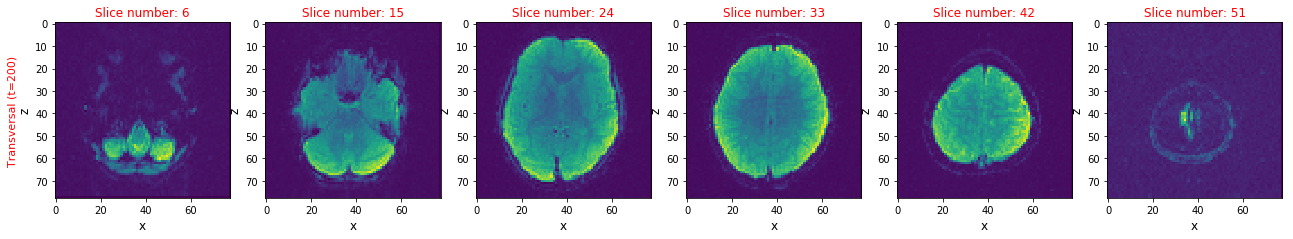

In [269]:
fig, ax = plt.subplots(1, 6, figsize=[22, 3.5])
fig.text(0.095, 0.5, "Transversal (t=200)", va='center', rotation='vertical', color="r", size=11)
for i, slice_no in enumerate(range(6, 54, 9)):
    ax[i].imshow(transversal[:, :, slice_no, 200])
#     ax[i].axis('off')
    ax[i].set_xlabel('x', size = 12)
    ax[i].set_ylabel('z', size = 12)
    ax[i].set_title('Slice number: {}'.format(slice_no), color='r')
fig.savefig('plots/transversal.png')

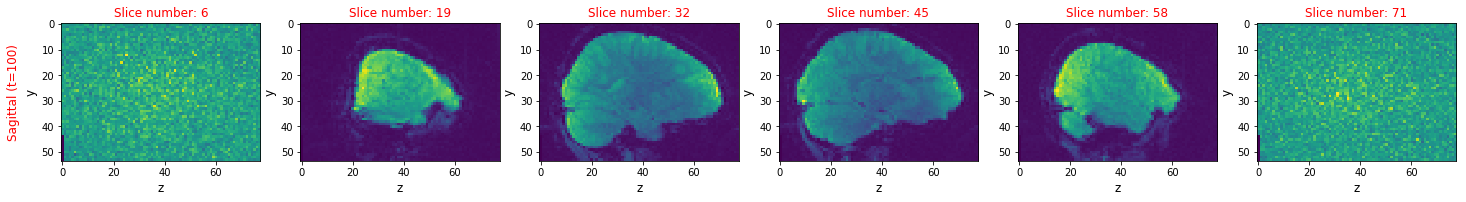

In [263]:
fig, ax = plt.subplots(1, 6, figsize=[25, 3])
fig.text(0.095, 0.5, "Sagittal (t=100)", va='center', rotation='vertical', color="r", size = 12)
for i, slice_no in enumerate(range(6, 78, 13)):
    ax[i].imshow(sagittal[:, :, slice_no, 100])
#     ax[i].axis('off')
    ax[i].set_xlabel('z', size = 12)
    ax[i].set_ylabel('y', size = 12)
    ax[i].set_title('Slice number: {}'.format(slice_no), color='r')
fig.savefig('plots/sagittal.png')

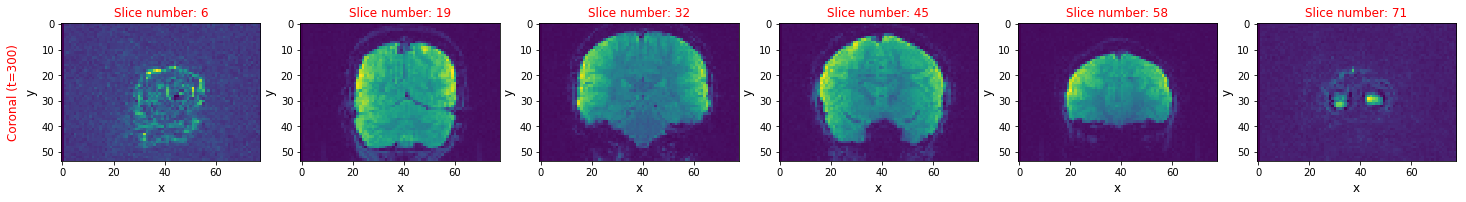

In [264]:
fig, ax = plt.subplots(1, 6, figsize=[25, 3])
fig.text(0.095, 0.5, "Coronal (t=300)", va='center', rotation='vertical', color="r", size = 12)
for i, slice_no in enumerate(range(6, 78, 13)):
    ax[i].imshow(coronal[:, :, slice_no, 300])
#     ax[i].axis('off')
    ax[i].set_xlabel('x', size = 12)
    ax[i].set_ylabel('y', size = 12)
    ax[i].set_title('Slice number: {}'.format(slice_no), color='r')
fig.savefig('plots/coronal.png')

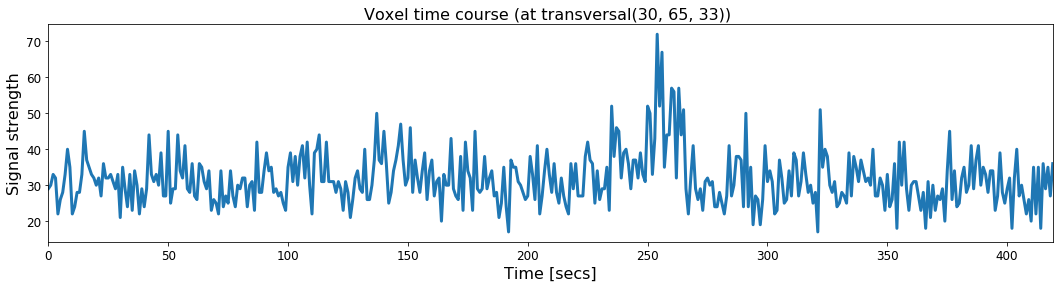

In [265]:
fig, ax = plt.subplots(1, 1, figsize=[18, 4])

# the timecourse of a random voxel
ax.plot(transversal[30, 65, 33, :], lw=3)
ax.set_xlim([0, transversal.shape[3]-1])
ax.set_xlabel('Time [secs]', fontsize=16)
ax.set_ylabel('Signal strength', fontsize=16)
ax.set_title('Voxel time course (at transversal(30, 65, 33)) ', fontsize=16)
ax.tick_params(labelsize=12)

fig.savefig('plots/voxel.png')

plt.show()

In [164]:
edge_list_file = open("/Users/pikachu/Desktop/NDD/temp/sub-NDARAA075AMK_task-rest_bold_JHU_res-2x2x2_measure-correlation.edgelist", "r")

adj_matrix = [line.split() for line in edge_list_file.readlines()]
# print(adj_matrix)
    

In [151]:
import networkx as nx

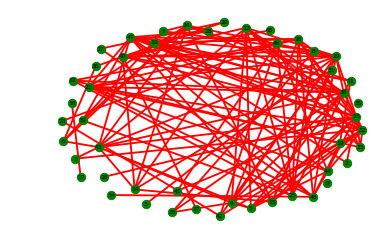

In [271]:
G = nx.Graph()
node_list = sorted(list(set([int(i) for i, j, w in adj_matrix])))
all_weights = sorted(list(set([float(w) for i, j, w in adj_matrix])))

import statistics 
mean_weight = statistics.mean(all_weights) * 1.99

labels = dict()
for node_name in node_list:
    labels[node_name] = str(node_name)

for node in node_list:
    G.add_node(node)
    
pos=nx.fruchterman_reingold_layout(G) 
nx.draw_networkx_nodes(G,pos,node_color='green',node_size=70)
nx.draw_networkx_labels(G,pos,labels,font_size=6)
for i, j, w in adj_matrix:
    G.add_edge(int(i), int(j), weight=float(w))

# for weight in all_weights:
#     weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
#     width = weight*len(node_list)*3.0/sum(all_weights)
#     nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width)


large_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']>=mean_weight]
nx.draw_networkx_edges(G,pos,edgelist=large_edges,width=width, edge_color='red')

# small_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']<mean_weight]
# nx.draw_networkx_edges(G,pos,edgelist=small_edges,width=width, edge_color='yellow', style='dashed')

plt.figure(1,figsize=(1024,1024)) 
plt.axis('off')
plt.savefig("Graph.png", format="PNG", dpi=300)

plt.show()